# 2.2. Properties of the Gaussian distribution

Once we have acquired a certain amount of familiarity with the gaussian distribution, we can go along some of its principal properties, which are the main reason of this distribution's wide usage in robotics.

In [1]:
# Imports

import numpy as np
from numpy import random
from scipy import stats
from scipy import signal
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## 2.2.1 Central limit theorem

**Property.** The sum of N independent and identically distributed (i.i.d.) random variables, i.e. that belong to the same distribution and are independant to each other, becomes increasingly Gaussian the larger is N.

This property holds true regardless of the probability distribution was used to create the samples. It is one of the key concepts in probability, as it allows the generalization of many problems.

You can see a video demonstration of this by running the cell bellow:

In [ ]:
%%HTML
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/dlbkaurTAUg?autoplay=0&mute=1" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

**Assigment.**

We ask you to create a similar demonstration as the example above.

- Complete the following `plot_sum_demo` function. This function returns a vector of length `v_length`, which results from the sum of `N` randomly generated vectors using an uniform distribution $[0, 1)$. Each random vector should have the same length (for example `v_lenght=100`).
- Inside the function, plot the corresponding histogram.
- Finally, check that the resulting figure has the shape of a gaussian. 

In [10]:
def plot_sum(v_length, N):
    
    #create the vector for storing the sums
    sum_samples = np.zeros(v_length)
    
    # Generate N vectors of samples and sum them within sum_samples
    for i in range(0, N):
        sum_samples += random.rand(v_length)
        
    # Plot the resultant histogram
    plt.hist(sum_samples,
             bins=25, density=True,
             stacked=True, edgecolor='black')    

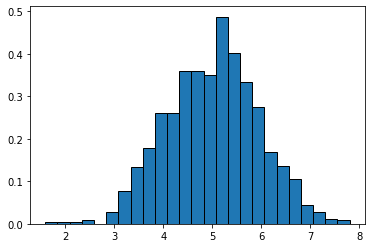

In [11]:
v_length = 1000
N = 10
plot_sum(v_length, N)

Now play a bit with the number of randomly generated vectors

In [13]:
interact(plot_sum, v_length=fixed(v_length), N=(0, 1005, 1))

interactive(children=(IntSlider(value=502, description='N', max=1005), Output()), _dom_classes=('widget-intera…

<function __main__.plot_sum(v_length, N)>

## 2.2.2 Product of gaussians

The weighted sum of two gaussians, results in a random variable which its the product of both. This product of 2 gaussians is defined as:

$$
     N\left(
        \frac{\sigma_2^2\mu_1+\sigma_1^2\mu_2}
        {\sigma_1^2+\sigma_2^2},
         \frac{\sigma_1^2 \sigma_ 2^2}
         {\sigma_1^2 + \sigma_ 2^2}
     \right)
$$

**Assignment.**

Complete the following function to compute the product of two gaussians distributions.

Draw the result and check that corresponds to the formula above playing with different distributions.

![](images/fig2-2-3.png)

In [39]:
def gaussians_product(mu1,mu2,sig1,sig2,x):
    
    var1, var2 = np.square(sig1), np.square(sig2) # Get the variances from the standar deviations

    X = np.arange(-12, 12, 1/x)
    print(X)
    pdf1 = stats.norm(loc=mu1, scale=var1).pdf(X)
    pdf2 = stats.norm(loc=mu2, scale=var2).pdf(X)

    plt.plot(X, pdf1, label='N({},{})'.format(mu1, sig1))
    plt.plot(X, pdf2, label='N({},{})'.format(mu2, sig2))
    
    # Get the parameters defining the gaussian distribution resulting from their product
    mu3 = (var2*mu1+var1*mu2)/(var1+var2)
    sig3 = (var1*var2)/(var1+var2)
    var3 = np.square(sig3)
    c = stats.norm(loc=mu3, scale=var3).pdf(X)

    plt.plot(X, c, label='Avg. = N({},{})'.format(mu3, sig3))
    plt.legend()


[-12.    -11.999 -11.998 ...  11.997  11.998  11.999]


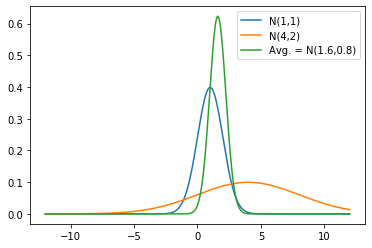

In [42]:
mu1, sig1 = 1, 1
mu2, sig2 = 4, 2
x = 1000    

gaussians_product(mu1,mu2,sig1,sig2,x)

## 2.2.3 Linear transformation of gaussian random variables.

**Property.** The gaussian distributions are closed under linear transformations, i.e. when we apply a sum or product to normal random variables, the result is also a normal random variable.

This is also a remarkable property, for example in the field of robotics we can *operate normally over random distributions* as long as we only use linear functions.
Otherwise, if we are in need to apply a *non-linear transformation*(e.g. sine, cosine, ...), the resulting probability distribution *it will not correspond to any Gaussian pdf*, causing additional complications in the process.

**Assignment.**

- Generate a number `n_samples` of random samples from the dist. $N(1,1)$.
- Then transform it following the expression $y = a*x + b$ and plot the result for $a=b=2$.
- Finally, draw on top the pdf of $N(4,4)$ and check that both are the same.

![](images/fig2-2-4.png)

In [69]:
def linear_transformation(n_samples, a, b):
    """Apply lineal transform. Generating n_samples samples from N(1,1)"""
    
    # Generates n_samples from N(1,1)
    mu = 1
    stdv = np.square(1)
    samples = stats.norm(loc=mu, scale=stdv).rvs(n_samples)
    
    samples_2 = a*samples+b # Apply the linear transformation to the samples

    # Plot histogram (blue bars)
    n, bins, patches = plt.hist(samples_2, bins=90, density=True, stacked=True)

    delta = 1/samples.size 
    X = np.arange(bins[0], bins[-1], delta)
    A = stats.norm(loc=mu, scale=stdv).pdf(X) # Evaluate N(1,1) in X
    B = stats.norm(loc=a*mu+b, scale=stdv*a).pdf(X) # Evaluate the resultant distribution in X
    
    # Show results
    plt.plot(X, A, color='green', label='N({},{})'.format(mu, stdv))
    plt.plot(X, B, color='red', label='N({},{})'.format(a*mu+a, stdv*a))
    plt.legend()

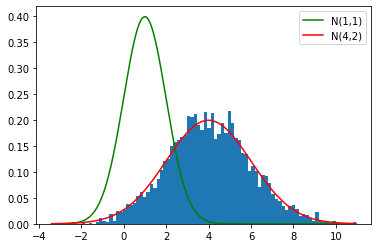

In [71]:
n_samples = 3000
a = 2
b = 2
linear_transformation(n_samples, a, b)

Now play a bit with different values for $a$ and $b$.

In [48]:
interact(linear_transformation, n_samples=fixed(n_samples), b=(-5, 5, 1), a=(1, 10, 1))

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=0, description='b', …

<function __main__.linear_transformation(n_samples, a, b)>

## Student discussion
In the cell below, discuss what has been done in the notebook, what you have found interesting, or any other relevant thought.

<span style="color:green">***Write your answer here***</span>